### Ce notebook contient les exercices du cours ["SVM linéaires"](http://cedric.cnam.fr/vertigo/Cours/ml2/tpSVMLineaires.html) proposé par le CNAM.
#### Pour les notes de cours, voir [DAUCE_W2](http://localhost:8888/notebooks/Documents/LabBooks/DAUCE-W2.ipynb).

## Réaliser un SVM linéaire à partir de la bibliothèque sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Chargement des données
iris = datasets.load_iris()
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [2]:
# Garder juste les deux premiers attributs
X = iris.data[:,:2]
Y = iris.target
X, Y

(array([[ 5.1,  3.5],
        [ 4.9,  3. ],
        [ 4.7,  3.2],
        [ 4.6,  3.1],
        [ 5. ,  3.6],
        [ 5.4,  3.9],
        [ 4.6,  3.4],
        [ 5. ,  3.4],
        [ 4.4,  2.9],
        [ 4.9,  3.1],
        [ 5.4,  3.7],
        [ 4.8,  3.4],
        [ 4.8,  3. ],
        [ 4.3,  3. ],
        [ 5.8,  4. ],
        [ 5.7,  4.4],
        [ 5.4,  3.9],
        [ 5.1,  3.5],
        [ 5.7,  3.8],
        [ 5.1,  3.8],
        [ 5.4,  3.4],
        [ 5.1,  3.7],
        [ 4.6,  3.6],
        [ 5.1,  3.3],
        [ 4.8,  3.4],
        [ 5. ,  3. ],
        [ 5. ,  3.4],
        [ 5.2,  3.5],
        [ 5.2,  3.4],
        [ 4.7,  3.2],
        [ 4.8,  3.1],
        [ 5.4,  3.4],
        [ 5.2,  4.1],
        [ 5.5,  4.2],
        [ 4.9,  3.1],
        [ 5. ,  3.2],
        [ 5.5,  3.5],
        [ 4.9,  3.1],
        [ 4.4,  3. ],
        [ 5.1,  3.4],
        [ 5. ,  3.5],
        [ 4.5,  2.3],
        [ 4.4,  3.2],
        [ 5. ,  3.5],
        [ 5.1,  3.8],
        [ 

In [3]:
# Pour afficher la surface de décision, on discrétise l'espace avec un pas h
h = 0.2
C = 1.0 # paramètrede régularisation
svc = svm.SVC(kernel='linear', C=C).fit(X,Y)
lin_svc = svm.LinearSVC(C=C).fit(X,Y)
# Créer la surface de décision discrétisée
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max))
titles = ['SVC w/ linear kernel', 'LinearSVC (linear kernel)']

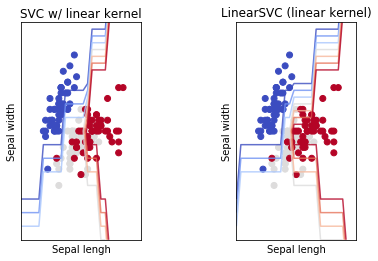

In [4]:
# Création des graphiques
for i, clf in enumerate((svc, lin_svc)):
    plt.subplot(1, 2, i+1)
    plt.subplots_adjust(wspace=0.8, hspace=0.8)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Utiliser une palette de couleurs
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Afficher aussi les points d'apprentissage
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal lengh')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

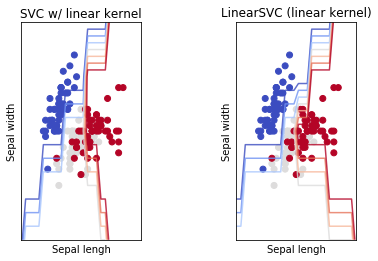

In [5]:
# Jouer avec d'autres paramètres C

# Pour afficher la surface de décision, on discrétise l'espace avec un pas h
h = 0.2
C = 3 # paramètrede régularisation
svc = svm.SVC(kernel='linear', C=C).fit(X,Y)
lin_svc = svm.LinearSVC(C=C).fit(X,Y)
# Créer la surface de décision discrétisée
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max))
titles = ['SVC w/ linear kernel', 'LinearSVC (linear kernel)']
# Création des graphiques
for i, clf in enumerate((svc, lin_svc)):
    plt.subplot(1, 2, i+1)
    plt.subplots_adjust(wspace=0.8, hspace=0.8)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Utiliser une palette de couleurs
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Afficher aussi les points d'apprentissage
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal lengh')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()